In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
print("Shape:", df.shape)
df.info()

Shape: (1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [6]:
df.describe(include='all')

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


In [8]:
df.mode().iloc[0]

Transaction ID               1
Date                2023-05-16
Customer ID            CUST001
Gender                  Female
Age                       43.0
Product Category      Clothing
Quantity                   4.0
Price per Unit            50.0
Total Amount              50.0
Name: 0, dtype: object

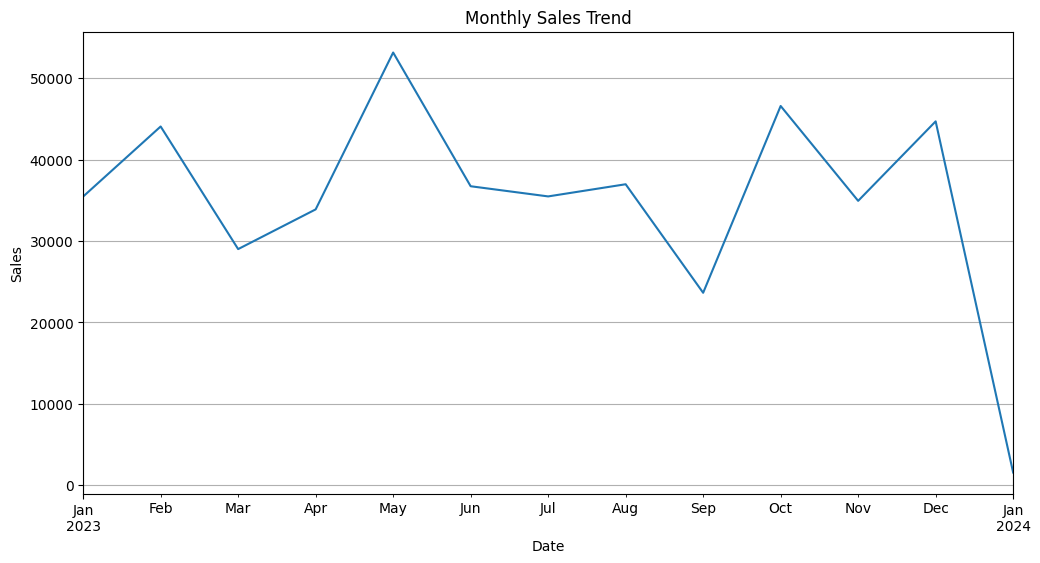

In [26]:

# Resample monthly sales
monthly_sales = df['Total Amount'].resample('ME').sum()

# Plot time series
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


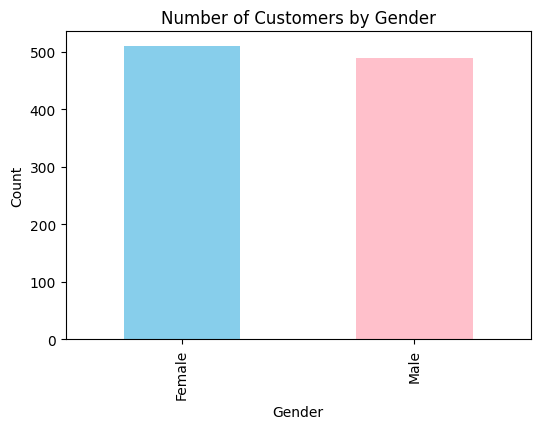

In [28]:
gender_counts = df['Gender'].value_counts()
gender_sales = df.groupby('Gender')['Total Amount'].sum()

# Optional: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title("Number of Customers by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


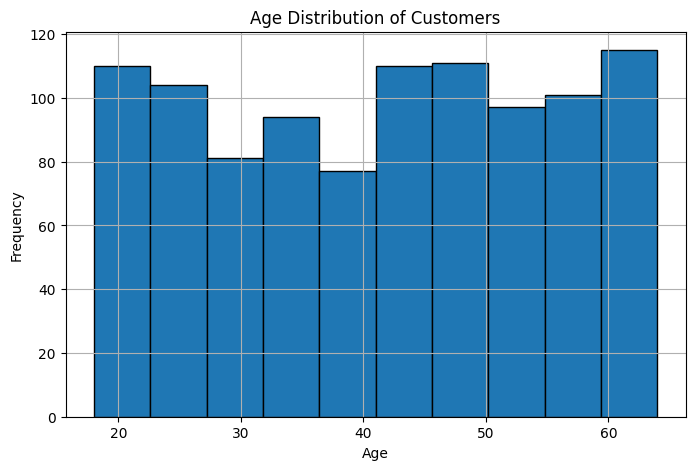

In [29]:
plt.figure(figsize=(8,5))
df['Age'].plot(kind='hist', bins=10, edgecolor='black')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [30]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
print(top_customers)


Customer ID
CUST015    2000
CUST412    2000
CUST970    2000
CUST547    2000
CUST281    2000
CUST416    2000
CUST420    2000
CUST927    2000
CUST447    2000
CUST342    2000
Name: Total Amount, dtype: int64


In [31]:
top_products = df['Product Category'].value_counts().head(10)
print(top_products)


Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


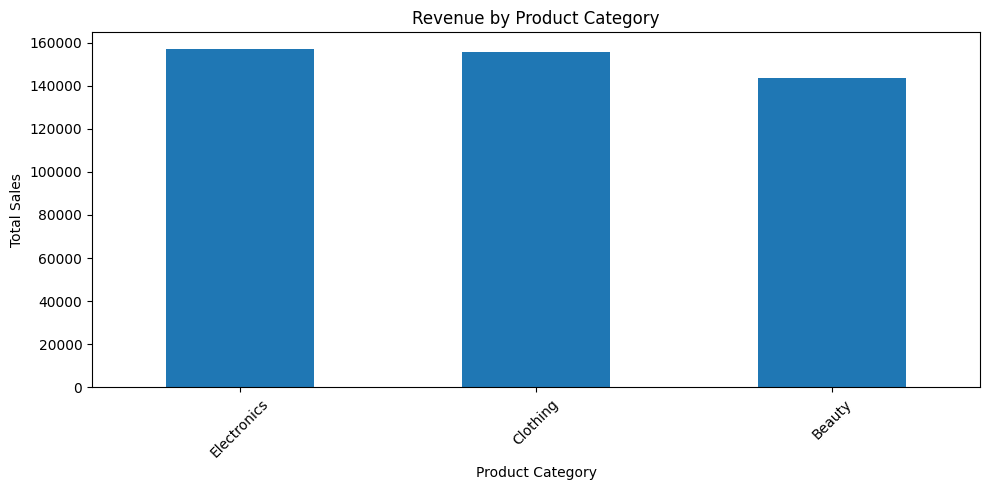

In [32]:
revenue_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
revenue_by_category.plot(kind='bar')
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
gender_avg_spending = df.groupby('Gender')['Total Amount'].mean()
print(gender_avg_spending)


Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64
